# Content and Objective

+ Showing behavior of time diversity as, e.g., diversity order

In [1]:
# importing

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
#plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 12) )

# Show Effects on BER

### parameters

In [3]:
# switch to normalize Tx power if necessary, 
# e.g., to have identical E_b when applying repetition coding    
div_is_normalized = 1

# parameters for signal constellations and snr

# find constellation points in the IQ plane
constellation = np.array( [1, -1] )
M = len( constellation )


# EbN0 to be used for the simulation
EsN0_db_min = 0
EsN0_db_max = 20    
EsN0_db_step = 4

EsN0_db_range = np.arange( EsN0_db_min, EsN0_db_max + EsN0_db_step, EsN0_db_step)
EsN0_range = 10**( np.array(EsN0_db_range)/10. )

# parameters limiting simulation time
max_errors = 5e1
max_syms = 1e6

### define combining methods

In [4]:
# diversity realizations 
# comb_method has to have same length or only one element then being the same for all N_divs
# if N_div is empty no combining will be performed

N_divs = [ 8, 16]  
comb_methods = ['MRC']

# get combinations of number of diversity and methods
N_div = N_divs * len( comb_methods )
comb_method = sorted( comb_methods * len( N_divs ) )

### simulation

In [5]:
# initialize arrays for storing simulation results
ser = np.zeros( len(EsN0_db_range) )
ser_comb = np.zeros( ( len(comb_method), len(EsN0_db_range) ) )


# loop for snr
for n_snr, esn0_db in enumerate( EsN0_db_range ):

    esn0 = 10**( esn0_db/10. )
    noise_power = 1./ esn0
    

    ### generate multiple observations and apply diversity
    ### assuming perfect CSIR          
    for k in np.arange(len(comb_method)):    

        num_errors_comb = 0
        num_syms_comb = 0    

        # loop for errors        
        while ( num_syms_comb < max_syms and num_errors_comb < max_errors):

            # generate data symbols and build tx symbol
            d = np.random.randint( 0, M)
            s = constellation[ d ]

            if div_is_normalized:
                s_div = s / np.sqrt( N_div[k])
            else:
                s_div = s


            # generate channel and faded noisy signal
            # note that the channel is always complex-valued since a phase shift may still occurr
            h_div = 1./np.sqrt(2) * (np.random.normal( size = N_div[k] ) + 1j*np.random.normal( size = N_div[k] ) )                

            noise_div = np.sqrt( noise_power/2 ) * ( np.random.normal( size = N_div[k] ) + 1j*np.random.normal( size = N_div[k] ) )

            # apply channel and noise
            r_div = h_div * s_div + noise_div     

            # apply combining method
            a_comb = np.conjugate( h_div ) / np.linalg.norm( h_div )            
            
            r_comb = np.dot(a_comb, r_div)

            # demodulate
            d_est_comb = np.argmin( np.abs( constellation - r_comb * np.ones(len(constellation)) )**2 )                

            if abs( d_est_comb - d ) > 0:
                    num_errors_comb += 1

            num_syms_comb += 1

        # ser                
        ser_comb[ k, n_snr ] = num_errors_comb / (num_syms_comb * 1.0 ) 

    # activate if you like to monitor progress
    print('Es/N0 (dB) = {:2.2f}'.format(esn0_db))

Es/N0 (dB) = 0.00
Es/N0 (dB) = 4.00
Es/N0 (dB) = 8.00
Es/N0 (dB) = 12.00
Es/N0 (dB) = 16.00
Es/N0 (dB) = 20.00


### first with exact solution 

(-0.5, 17)

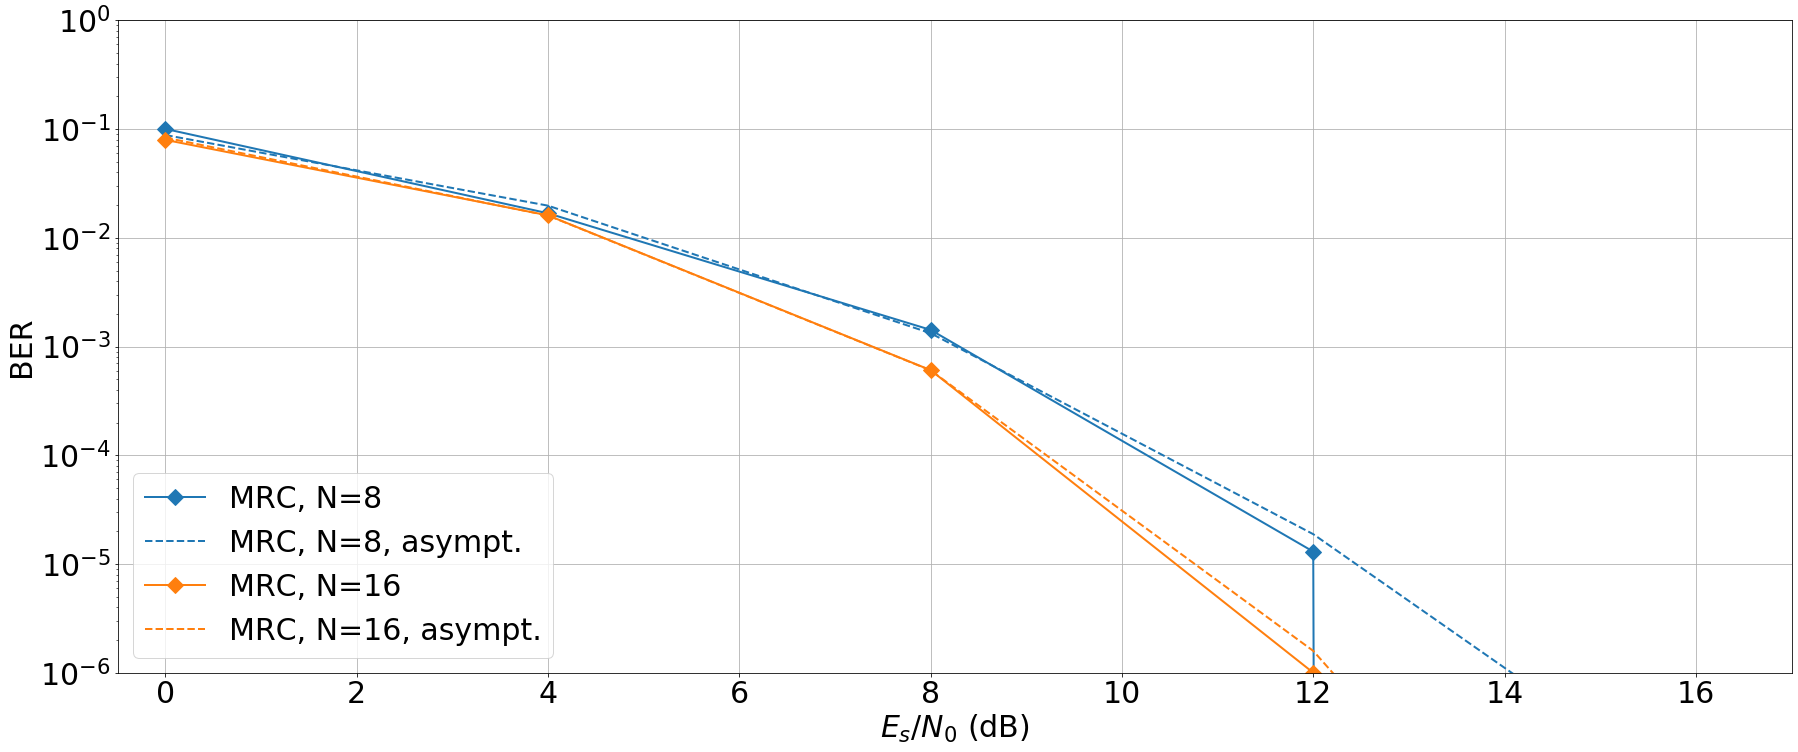

In [6]:
######################################      
# plotting
######################################    

# plotting
plt.figure()

# loop across markes 
markers = [ 'D', 'o', '*', 's', 'v', 'p' ]

# combining methods have identical colors but alternating markers
for k in np.arange(len(comb_method)):

    mark_ind = 0
    ax_comb = plt.plot( EsN0_db_range, ser_comb[k, :], label=comb_method[k]+", N="+str(N_div[k]), linewidth = 2.0, marker = markers[ mark_ind ], markersize = 12 )      
    color_comb = ax_comb[0].get_color()                

    # theoretical value
    div_is_normalized = 1
    if div_is_normalized:
        snr = EsN0_range / N_div[ k ]
    else:
        snr = EsN0_range
    
    mu = np.sqrt( snr / ( 1 + snr ) )
    pe = np.zeros_like( EsN0_range )
    
    for _n in range( N_div[k] ):
        pe += special.binom( N_div[k] - 1 + _n, _n ) * ( (1 + mu) / 2 )**_n
    
    pe *= ( (1 - mu ) / 2 )**N_div[k]
        
    plt.plot( EsN0_db_range, pe, '--', label=comb_method[k]+", N="+str(N_div[k])+", asympt.", linewidth = 2.0, color = color_comb )
        
    mark_ind += 1
        


plt.yscale('log')
plt.grid(True)
plt.legend(loc='lower left') 

plt.xlabel('$E_s/N_0$ (dB)')
plt.ylabel('BER')
plt.ylim( ymin=1e-6, ymax=1e0 )
plt.xlim( (-.5, 17))
    

### now with large SNR approximation

(1e-05, 1.0)

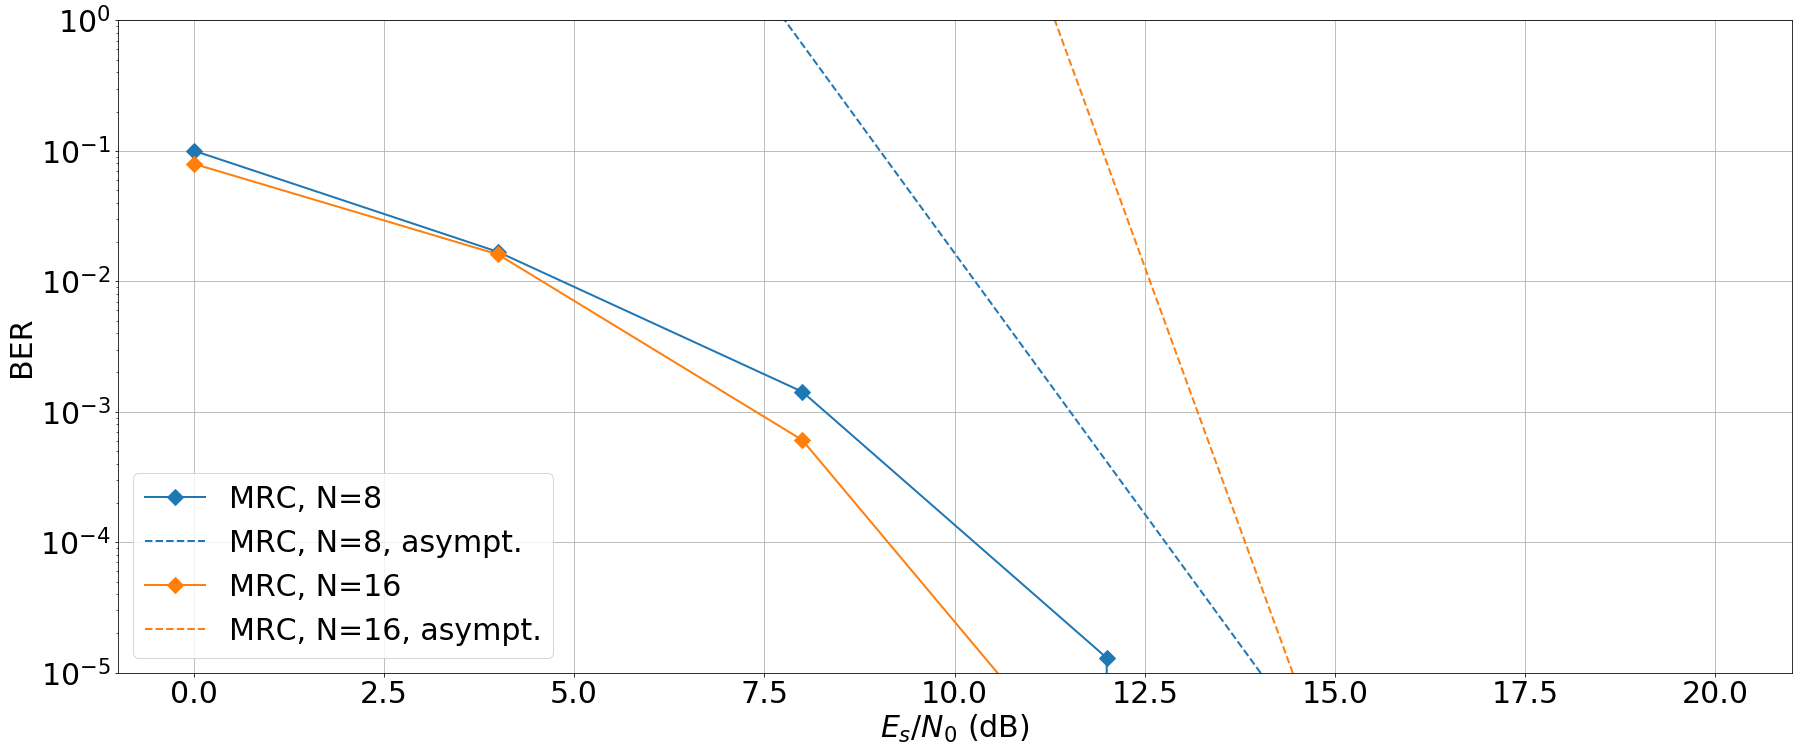

In [7]:
######################################      
# plotting
######################################    

# plotting
plt.figure()

# loop across markes 
markers = [ 'D', 'o', '*', 's', 'v', 'p' ]

# combining methods have identical colors but alternating markers
for k in np.arange(len(comb_method)):

    mark_ind = 0
    ax_comb = plt.plot( EsN0_db_range, ser_comb[k, :], label=comb_method[k]+", N="+str(N_div[k]), linewidth = 2.0, marker = markers[ mark_ind ], markersize = 12 )      
    color_comb = ax_comb[0].get_color()                

    # theoretical value
    if div_is_normalized:
        snr = EsN0_range / N_div[k] 
    else:
        snr = EsN0_range 
        
    ser_asymptotic = special.binom( 2 * N_div[k] - 1, N_div[k] ) * 1 / ( ( 4. * snr ) **( N_div[k] ) )
        
    plt.plot( EsN0_db_range, ser_asymptotic, '--', label=comb_method[k]+", N="+str(N_div[k])+", asympt.", linewidth = 2.0, color = color_comb )
        
    mark_ind += 1
        


plt.yscale('log')
plt.grid(True)
plt.legend(loc='lower left') 

plt.xlabel('$E_s/N_0$ (dB)')
plt.ylabel('BER')
plt.ylim( ymin=1e-5, ymax=1e0 )
    